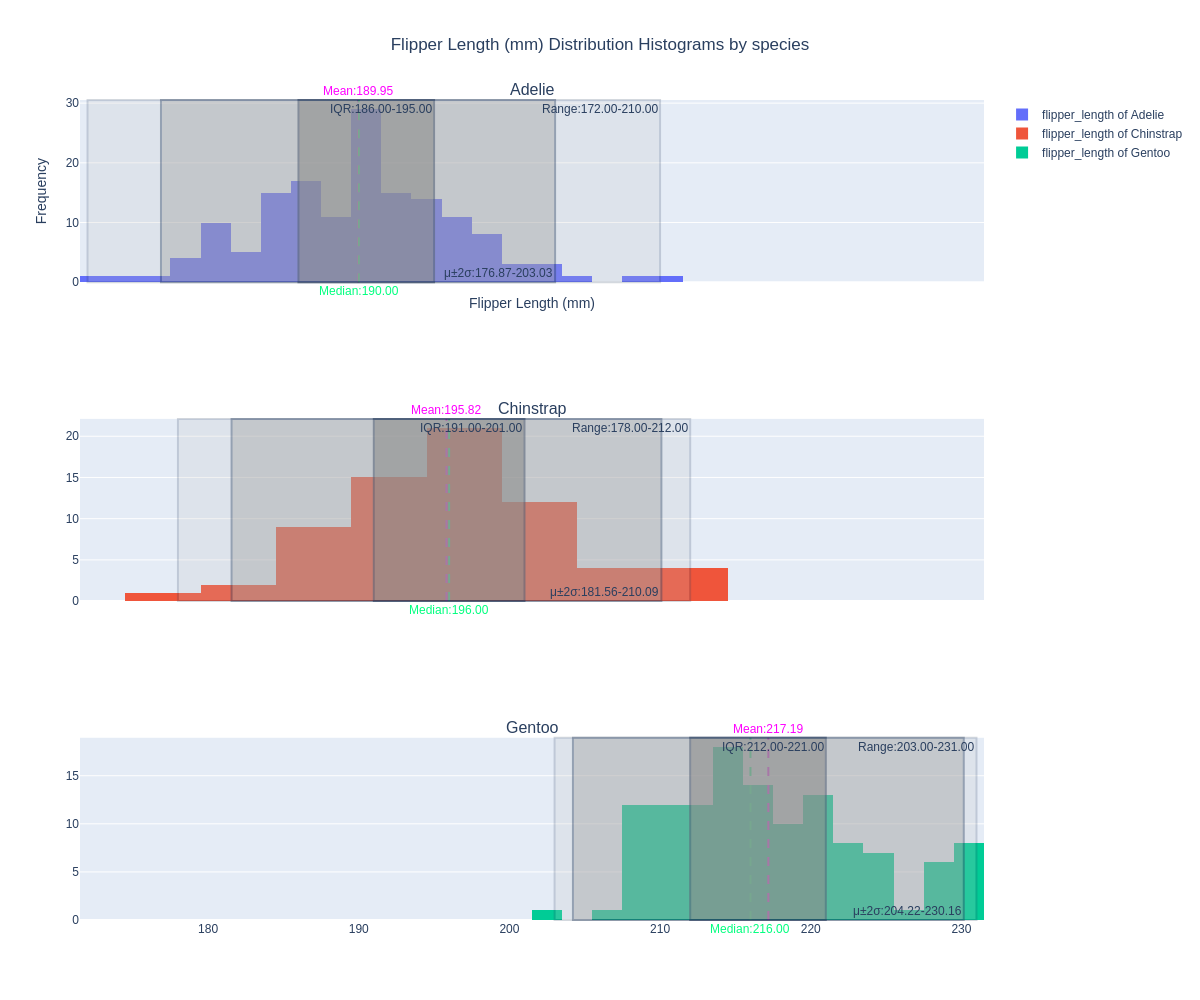

In [17]:
# 1.It is written by myself based on the link provided in HW, so no chatbot session history provided.
import pandas as pd
import plotly.subplots as sp
import plotly.graph_objects as go

pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
species = pingees.groupby("species")
figs = sp.make_subplots(rows=3,
                        cols=1,
                        shared_xaxes=True,
                        shared_yaxes=True,
                        subplot_titles=pingees['species'].unique()
                        )
for i, (name, group) in enumerate(species):
    flipper_length = group['flipper_length_mm']

    fig = go.Histogram(x=flipper_length,
                       name=f'flipper_length of {name}'
                       )

    figs.add_trace(fig,
                   row=i+1,
                   col=1
                   )

    μ = flipper_length.mean()

    figs.add_vline(μ,
                   annotation_text=f'Mean:{μ:.2f}',
                   annotation_position='top',
                   annotation_font_color='#FF00FF',
                   line_dash='dash',
                   line_color='#FF00FF',
                   row=i+1,
                   col=1
                   )

    med = flipper_length.median()

    figs.add_vline(flipper_length.median(),
                   annotation_text=f'Median:{med:.2f}',
                   annotation_position='bottom',
                   annotation_font_color='#00FF7F',
                   line_dash='dash',
                   line_color='#00FF7F',
                   row=i+1,
                   col=1
                   )

    min_, max_ = flipper_length.min(), flipper_length.max()

    figs.add_vrect(min_,
                   max_,
                   annotation_text=f'Range:{min_:.2f}-{max_:.2f}',
                   annotation_position='top right',
                   fillcolor='#C0C0C0',
                   opacity=0.2,
                   row=i+1,
                   col=1
                   )
    
    q1, q3 = flipper_length.quantile(0.25), flipper_length.quantile(0.75)
    figs.add_vrect(q1,
                   q3,
                   annotation_text=f'IQR:{q1:.2f}-{q3:.2f}',
                   annotation_position='top right',
                   fillcolor='#808080',
                   opacity=0.6,
                   row=i+1,
                   col=1
                   )

    σ = flipper_length.std()

    figs.add_vrect(μ-2*σ,
                   μ+2*σ,
                   annotation_text=f'μ±2σ:{μ-2*σ:.2f}-{μ+2*σ:.2f}',
                   annotation_position='bottom right',
                   fillcolor='#A0A0A0',
                   opacity=0.4,
                   row=i+1,
                   col=1
                   )

figs.update_layout(height=1000,
                   width=1200,
                   title_text="Flipper Length (mm) Distribution Histograms by species",
                   title_x=0.5,
                   xaxis_title="Flipper Length (mm)",
                   yaxis_title="Frequency"
                  )

figs.show(renderer="png")

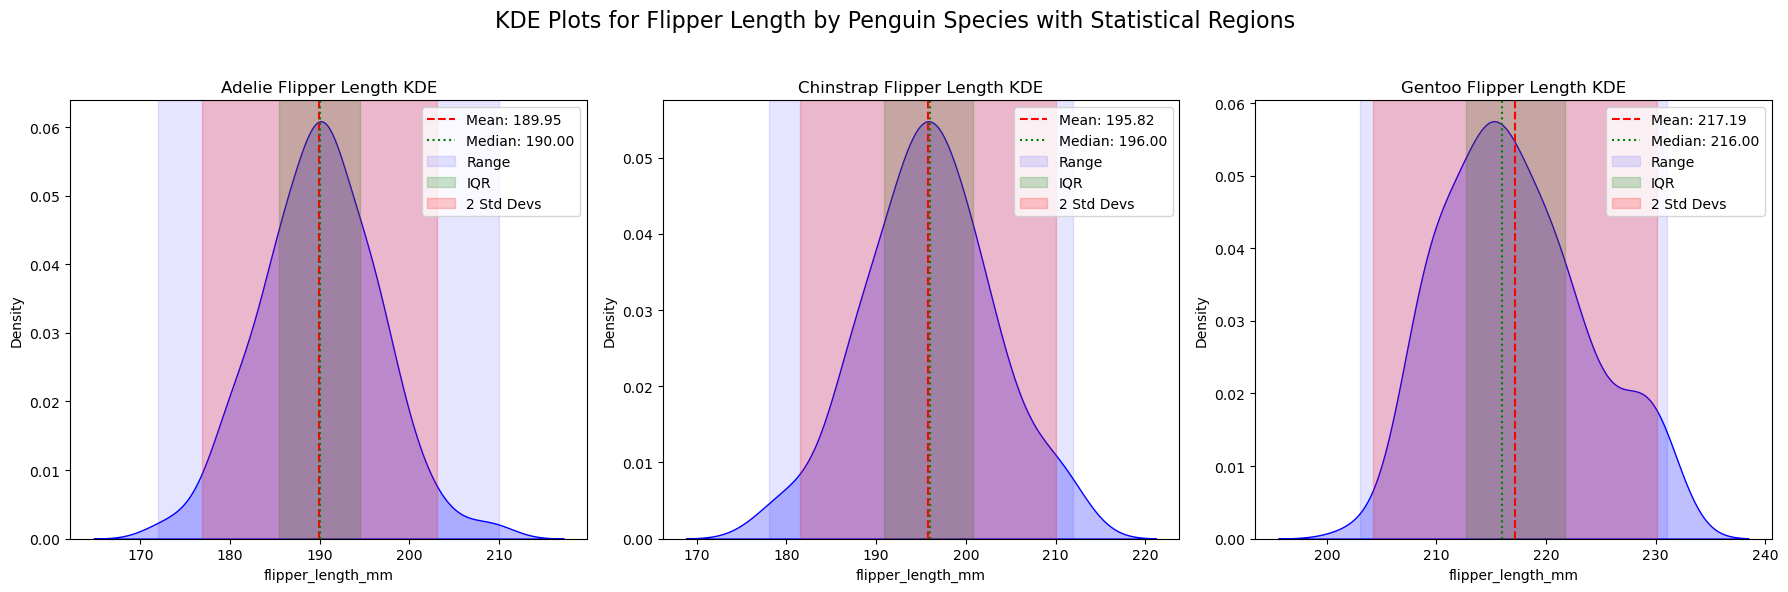

In [3]:
#2 link: https://chatgpt.com/share/66f0a87f-cbb0-8002-9c04-c62548fb4ef2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Filter out rows with missing 'flipper_length_mm' data
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Set up species groups
species_list = penguins['species'].unique()

# Function to get basic statistics for each species
def get_stats(data, column):
    mean = data[column].mean()
    median = data[column].median()
    min_val = data[column].min()
    max_val = data[column].max()
    std = data[column].std()
    iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
    range_std = (mean - 2 * std, mean + 2 * std)
    return mean, median, min_val, max_val, iqr, range_std

# Set up the figure for three subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop over each species and create the KDE plots
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]
    
    # Calculate statistics
    mean, median, min_val, max_val, iqr, range_std = get_stats(species_data, 'flipper_length_mm')
    
    # Plot KDE for flipper length
    sns.kdeplot(species_data['flipper_length_mm'], fill=True, ax=axes[i], color="blue")
    
    # Add vertical lines for mean and median
    axes[i].axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    axes[i].axvline(median, color='green', linestyle=':', label=f'Median: {median:.2f}')
    
    # Add shaded regions for range, IQR, and 2 standard deviations
    # Range (min to max)
    axes[i].axvspan(min_val, max_val, alpha=0.1, color='blue', label='Range')
    
    # IQR
    axes[i].axvspan(mean - iqr / 2, mean + iqr / 2, alpha=0.2, color='green', label='IQR')
    
    # 2 Standard deviations away from the mean
    axes[i].axvspan(range_std[0], range_std[1], alpha=0.2, color='red', label='2 Std Devs')
    
    # Title and legend
    axes[i].set_title(f'{species} Flipper Length KDE')
    axes[i].legend()

# Adjust layout and show the figure
plt.suptitle('KDE Plots for Flipper Length by Penguin Species with Statistical Regions', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#3.
link: https://chatgpt.com/share/66f0a87f-cbb0-8002-9c04-c62548fb4ef2
Summary of Our Interaction:
Initial Task (Seaborn KDE Plot with Plotly Histogram Overlays):

You requested assistance on using Seaborn’s Kernel Density Estimation (KDE) plots to mark mean, median, range, interquartile range (IQR), and two standard deviations for the flipper_length_mm feature in the penguins dataset. The task also required combining this with Plotly histograms for each species.
We explored using Seaborn’s KDE plots along with Plotly subplots to generate histograms, including vertical lines for mean and median and regions for IQR, range, and 2 standard deviations.
After some debugging related to vertical lines and regions displaying incorrectly at the bottom, we adjusted the scaling to ensure the regions and lines scaled to the full y-axis height, improving the visualization.
Problem with Regions and Lines in Plotly:

Initially, the lines and shaded regions representing statistical measures (mean, median, IQR, etc.) appeared at the bottom of the figures due to y-axis scaling issues.
We resolved this by calculating the maximum histogram height and adjusting the regions (y1) dynamically based on the actual heights of the histogram to ensure that lines and shaded regions extended properly across the plot.
Rewriting Task Using Seaborn KDE:

You then requested a similar task but using Seaborn KDE plots exclusively (without Plotly histograms).
I helped create Seaborn KDE plots for flipper_length_mm, organized in a row of three subplots (one for each penguin species), and highlighted the statistical regions:
Mean and median were marked with vertical lines.
Shaded regions were used to mark the range (min to max), IQR, and 2 standard deviations away from the mean.
Discussion on Data Visualization Types:

You asked for an evaluation of whether box plots, histograms, and KDEs effectively represent data spread.
We discussed:
Box plots are great for summarizing central tendencies and spread (range, IQR, median), but they don’t show distribution shape.
Histograms represent data spread well, especially when analyzing frequency distribution across subcategories, but are sensitive to bin size.
KDE plots provide a smoothed, continuous view of the data’s distribution, making it easier to analyze quantitatively compared to histograms.
Conclusion:

We successfully developed visualizations with KDEs, subplots, and statistical annotations for the penguin dataset. You now have clear comparisons between Seaborn KDE plots and other plot types, particularly in terms of how well they show data spread.

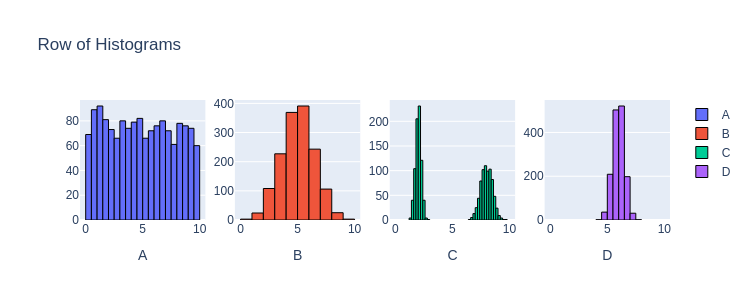

In [55]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png")

1. A and C has similar means and varience
2. AB and BC has similar means but different varience
3. BD has similar varience but different mean
4. AD and CD has different mean and different varience
   
   by looking code and mathematics
   
   for A, μ=5
   
   A = Uni(0,10) f(x)=1.0 for 0 < x < 10, 0 o/w
   
   E(x) = integration of xf(x) with respect to x
   
   E(x) = 5
   
   E(x^2)-5*5 = 25/3 = Var(A) (8.33)
   
   for B, μ=5, Var(B)= 1.5^2=2.25
   
   for C, μ= 2/2 + 8/2 = 5, Intuitively, Var(C) > Var(A) >> Var(B) > Var(D), IDK how to calculate varience of 2 PDF(not 2 normal distribution! obviously not 0.25+0.5=0.75), but I can use computer to do Monte Carlo method to know it is about 9
   
   for D, μ=6, Var(D)=0.5^2 = 0.25

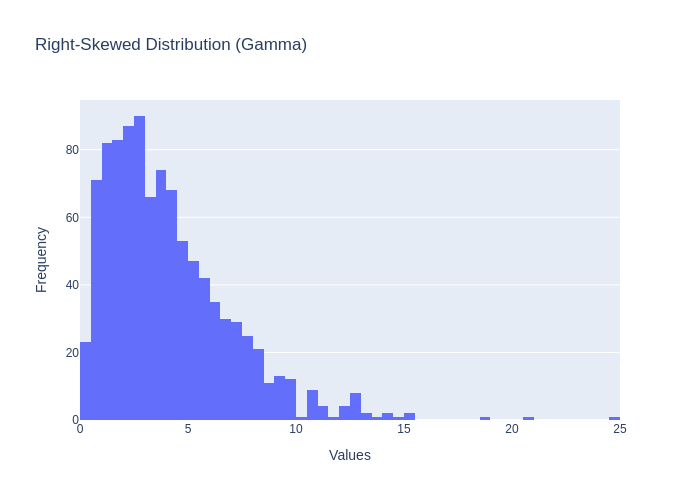

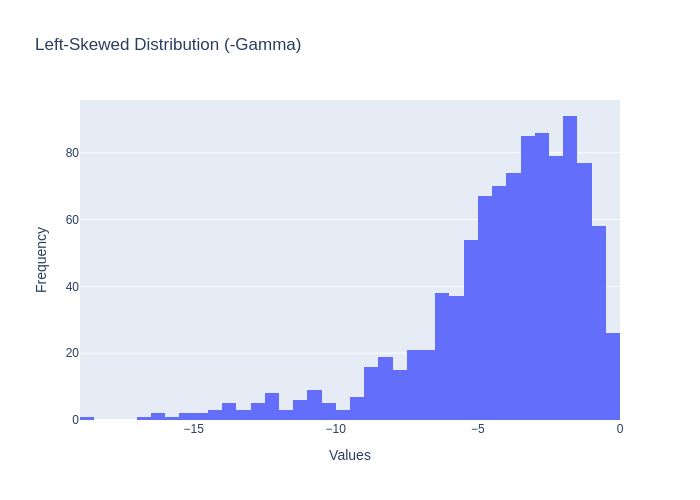

((4.100012754828485, 3.494275163724862),
 (-4.126245195388456, -3.4920773139770978),
 None,
 None)

In [1]:
# 5
# Let's extend the provided code step-by-step to demonstrate the relationship between mean, median, and mode for right and left-skewed distributions.

import numpy as np
import pandas as pd
import plotly.express as px
from scipy import stats

# Step 1: Generate the right-skewed (positive skewness) sample using gamma distribution
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram using plotly to visualize the right-skewed distribution
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title="Right-Skewed Distribution (Gamma)")
fig1.update_layout(xaxis_title="Values", yaxis_title="Frequency")

# Step 2: Compute and print the mean and median of the right-skewed sample
mean_sample1 = sample1.mean()
median_sample1 = np.quantile(sample1, 0.5)

# Step 3: Generate the left-skewed (negative skewness) sample by negating the gamma distribution
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram using plotly to visualize the left-skewed distribution
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", title="Left-Skewed Distribution (-Gamma)")
fig2.update_layout(xaxis_title="Values", yaxis_title="Frequency")

# Step 4: Compute and print the mean and median of the left-skewed sample
mean_sample2 = sample2.mean()
median_sample2 = np.quantile(sample2, 0.5)

(mean_sample1, median_sample1), (mean_sample2, median_sample2), fig1.show(renderer="png"), fig2.show(renderer="png")


link: https://chatgpt.com/share/66f36c4e-ae80-8002-908f-608f36a9d0d8

Summary of Interaction

Exploration of Skewness:

You asked for an explanation of the relationship between mean, median, and skewness in both right-skewed and left-skewed distributions.
Right-skewed distribution: The mean is greater than the median, which is greater than the mode.
Left-skewed distribution: The mean is less than the median, which is less than the mode.
This happens because the mean is sensitive to extreme values (outliers), whereas the median is resistant to outliers, and the mode represents the peak of the distribution.

Code Explanation:

You provided code that generates a right-skewed distribution (Gamma distribution) and left-skewed distribution (negated Gamma distribution).
The code calculates the mean and median of these distributions and visualizes them with histograms.

Extended Code:

I extended the code to also compute the mode of both distributions, and to visualize the skewness using histograms.
The right-skewed distribution showed that the mean > median > mode. The left-skewed distribution demonstrated that the mean < median < mode.

Technical Details:

The rendering of the visualizations using Plotly requires the Kaleido package to export images in certain formats, but you can use fig.show() locally after installing the package.

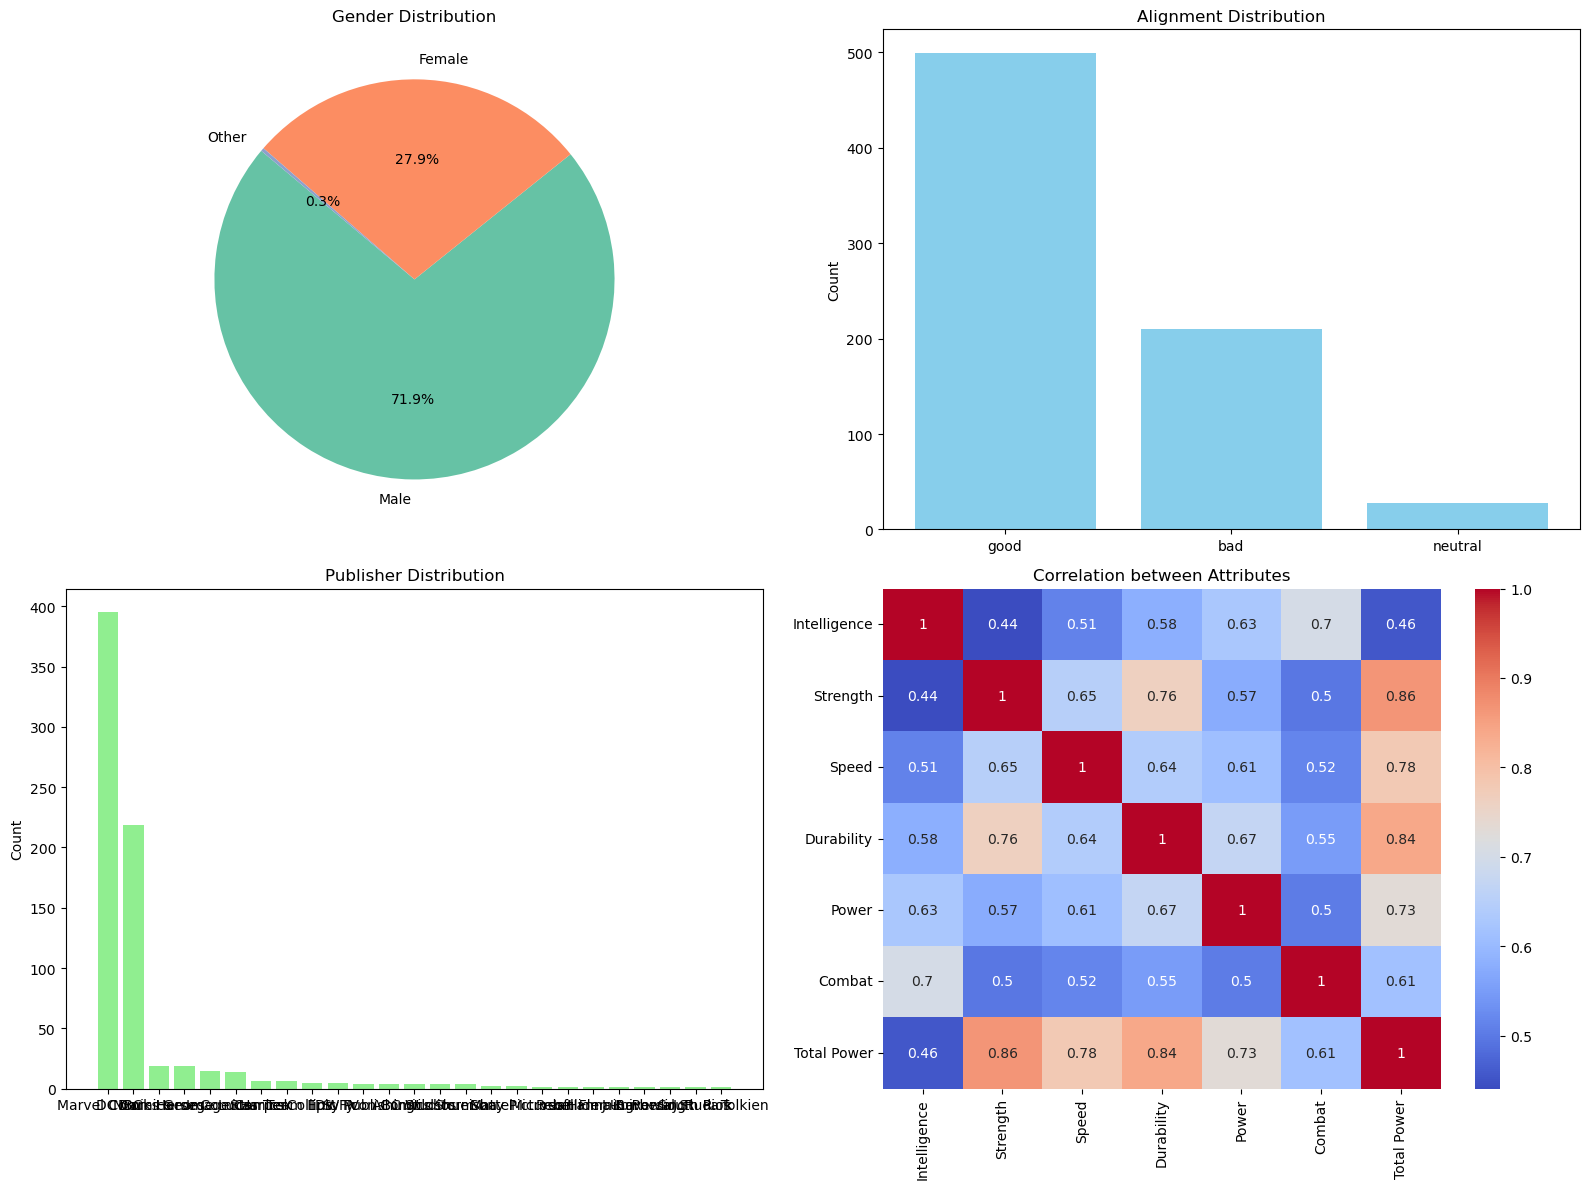

,Intelligence,Strength,Speed,Durability,Power,Combat,Total Power
count,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000
mean,75.632571,42.415882,41.063257,55.713324,60.969044,57.489906,358.156124
std,27.617738,34.366396,27.479716,33.277238,34.257671,29.130334,107.582626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000
25%,75.000000,10.000000,25.000000,30.000000,35.000000,40.000000,260.000000
50%,85.000000,35.000000,35.000000,60.000000,65.000000,65.000000,350.000000
75%,90.000000,75.000000,60.000000,85.000000,95.000000,80.000000,440.000000
max,100.000000,100.000000,100.000000,100.000000,240.000000,105.000000,600.000000


In [4]:
# 6
import matplotlib.pyplot as plt
import seaborn as sns

superhero_data = pd.read_csv("https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv")
# Summary statistics for the numerical attributes
summary_stats = superhero_data[['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat', 'Total Power']].describe()

# Gender, Alignment, and Publisher distributions
gender_dist = superhero_data['Gender'].value_counts()
alignment_dist = superhero_data['Alignment'].value_counts()
publisher_dist = superhero_data['Publisher'].value_counts()

# Plotting the distributions
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Gender distribution
axs[0, 0].pie(gender_dist, labels=gender_dist.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"), startangle=140)
axs[0, 0].set_title('Gender Distribution')

# Alignment distribution
axs[0, 1].bar(alignment_dist.index, alignment_dist.values, color='skyblue')
axs[0, 1].set_title('Alignment Distribution')
axs[0, 1].set_ylabel('Count')

# Publisher distribution
axs[1, 0].bar(publisher_dist.index, publisher_dist.values, color='lightgreen')
axs[1, 0].set_title('Publisher Distribution')
axs[1, 0].set_ylabel('Count')

# Correlation heatmap for the superhero attributes
correlation_matrix = superhero_data[['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat', 'Total Power']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axs[1, 1])
axs[1, 1].set_title('Correlation between Attributes')

plt.tight_layout()
plt.show()

# Display summary statistics
summary_stats


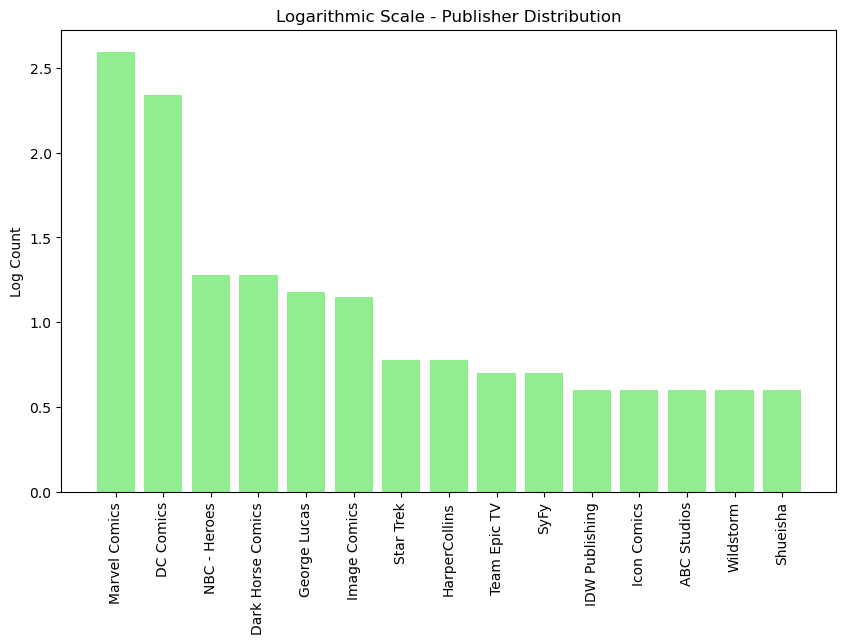

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Calculate Publisher distribution
publisher_dist = superhero_data['Publisher'].value_counts()

# Step 2: Apply Logarithmic Transformation
log_publisher_dist = np.log10(publisher_dist)[log_publisher_dist >= 0.5]

# Step 3: Plot the logarithmic distribution
plt.figure(figsize=(10, 6))
plt.bar(log_publisher_dist.index, log_publisher_dist.values, color='lightgreen')
plt.title('Logarithmic Scale - Publisher Distribution')
plt.ylabel('Log Count')
plt.xticks(rotation=90)
plt.show()


In [26]:
alignment_table = superhero_data.pivot_table(
    values='Name',  # Use 'Name' column to count the number of superheroes
    index='Publisher',  # Rows: Publisher
    columns='Alignment',  # Columns: Alignment (good, bad, neutral)
    aggfunc='count',  # Aggregation function: count the number of names
    fill_value=0  # Replace NaN with 0 where no heroes exist
)

# Step 2: Display the alignment table
print(alignment_table)

Alignment          bad  good  neutral
Publisher                            
ABC Studios          0     4        0
DC Comics           58   143       17
Dark Horse Comics    7    12        0
George Lucas         6     9        0
Hanna-Barbera        0     1        0
HarperCollins        0     6        0
IDW Publishing       0     4        0
Ian Fleming          0     1        0
Icon Comics          1     3        0
Image Comics        11     2        0
J. K. Rowling        0     1        0
J. R. R. Tolkien     1     0        0
Marvel Comics      119   263       10
Mattel               0     2        0
Microsoft            0     1        0
NBC - Heroes         3    16        0
Rebellion            0     1        0
Shueisha             1     3        0
Sony Pictures        0     2        0
South Park           0     1        0
Star Trek            0     5        0
SyFy                 0     5        0
Team Epic TV         1     4        0
Universal Studios    0     1        0
Wildstorm   

It seems like that most superheros are binary, either good or bad. DC is the most non-binary, which matches its story style. Where as Marvel has much more characters than DC, but less neutral than DC. However, all other publishers have no neutral superhero, prabably because their number of superheros and size of story development is not enough to hold the base requirement to construct a neutral one.

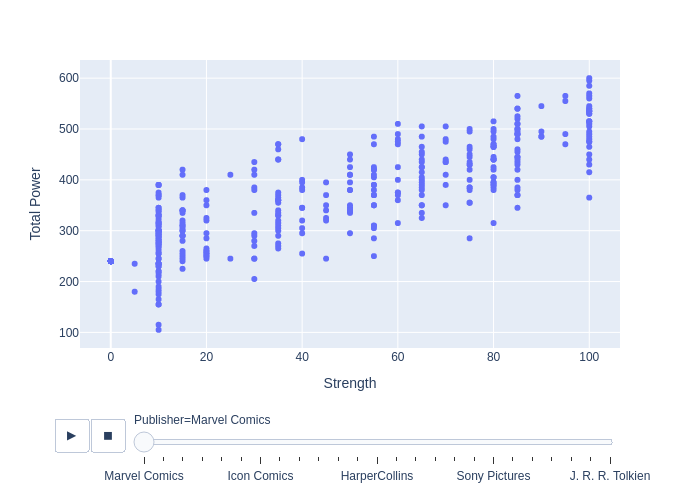

In [56]:
# 7
import plotly.express as px

df = superhero_data

fig = px.scatter(df, x='Strength', y='Total Power', animation_frame='Publisher')
fig.show(renderer='png')

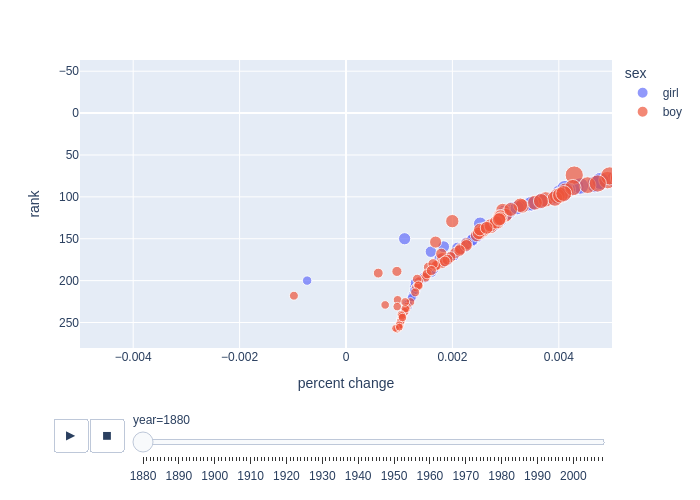

In [54]:
# 8.
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png")

9. Somewhat.